In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
heart_data = pd.read_csv('heart.csv')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
heart_data.shape #Printing the shape of dataset

(1025, 14)

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Checking about the missing values in the dataset
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Statistical Measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Checking the distribution of target values
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [8]:
x = heart_data.drop(columns = 'target' , axis=1)
y = heart_data['target']

In [9]:
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [10]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75,stratify=y, random_state =2)

In [12]:
print(x_train)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
54     55    1   0       140   217    0        1      111      1      5.6   
445    52    1   1       128   205    1        1      184      0      0.0   
637    58    0   2       120   340    0        1      172      0      0.0   
454    65    0   0       150   225    0        0      114      0      1.0   
317    63    0   2       135   252    0        0      172      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
221    63    1   0       130   254    0        0      147      0      1.4   
463    43    1   0       110   211    0        1      161      0      0.0   
1002   66    1   0       112   212    0        0      132      1      0.1   
966    58    1   0       128   259    0        0      130      1      3.0   
95     45    0   0       138   236    0        0      152      1      0.2   

      slope  ca  thal  
54        0   0     3  
445       2   0     2  
637

In [13]:

print(x_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
249   42    1   2       130   180    0        1      150      0      0.0   
523   61    1   0       148   203    0        1      161      0      0.0   
563   44    1   0       112   290    0        0      153      0      0.0   
742   63    1   0       130   330    1        0      132      1      1.8   
103   47    1   2       138   257    0        0      156      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
775   51    1   2       100   222    0        1      143      1      1.2   
292   61    1   2       150   243    1        1      137      1      1.0   
308   59    1   2       126   218    1        1      134      0      2.2   
175   56    0   0       200   288    1        0      133      1      4.0   
843   59    1   3       160   273    0        0      125      0      0.0   

     slope  ca  thal  
249      2   0     2  
523      2   1     3  
563      2   1    

In [14]:
print(x_test.shape)

(257, 13)


In [15]:
model = LogisticRegression()

In [16]:
model.fit(x_train, y_train)

LogisticRegression()

In [25]:

# checking the distribution of target variable

heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [26]:
X = heart_data.drop(columns = 'target', axis = 1)
X.head()

# now X contains table without target column which will help for training the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [27]:
Y = heart_data['target']
Y.head()

# Y contains one column which includes output for validating the result after model prediction 


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, stratify = Y, random_state = 3 )

# stratify will distribute 0 and 1 in even manner, of that prediction will be unbiased
# test_split tells a ratio about size of test data in dataset, means 30 percent of data is test data
# random_state tells about the randomness of data, and number tells about its extent of randomness


In [29]:
# checking shape of splitted data

print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (871, 13) (154, 13)


In [30]:
model = LogisticRegression()

In [31]:
# training the LogisticRegression model with training data
model.fit(X_train.values, Y_train)

LogisticRegression()

In [32]:
# accuracy function measures accuracy between two values,or columns

X_train_prediction = model.predict(X_train.values)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("The accuracy of training data : ", training_data_accuracy)

The accuracy of training data :  0.8622273249138921


In [34]:
import matplotlib.pyplot as plt

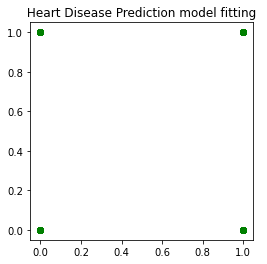

In [35]:
# prediction graph for training data

plt.figure(figsize=(4,4))
plt.scatter(Y_train, X_train_prediction , color = 'green')
plt.title(" Heart Disease Prediction model fitting ")
plt.show()

In [36]:

# accuracy of test data

X_test_prediction = model.predict(X_test.values)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("The accuracy of test data : ", test_data_accuracy)

The accuracy of test data :  0.8376623376623377


In [37]:
# input feature values
input_data = (42,1,0,136,315,0,1,125,1,1.8,1,0,1)

# change the input data into numpy array 

input_data_as_numpy_array = np.array(input_data)

# reshape the array to predict data for only one instance

reshaped_array = input_data_as_numpy_array.reshape(1,-1)

In [40]:
# predicting the result and printing it

prediction = model.predict(reshaped_array)

print(prediction)

if(prediction[0] == 1):
    print("Patient has a healthy heart 💛")

else:
    print("Patient has an unhealthy heart 💔")

[0]
Patient has an unhealthy heart 💔
